In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

%matplotlib inline

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Classifier
It is one of the simplest machine learning model for text classification. It uses the probabilisti distribution of tokens/words (counts) to classify documents. It is based on infamous **Bayes Theorem** which goes like this:

`Prob(B | A) = Prob(A | B) * Prob(B) / Prob(A)`

Fair enough, right?

## Text Classification
Say we have Document **D** that belongs to class **C**. So, using bayes theorem we can infer:  

`Prob(C | D) = Prob(D | C) * Prob(C) / Prob(D)`

So far so good.  

We know a document is made up of tokens (combination of tokens, commonly referred to as **ngram language model**):  
`D = [d1, d2, d3, ...]`

```bash
Prob(C | D)
= Prob(d1 | C) * Prob(d2 | C) * Prob(d3 | C) .... * Prob(C) / Prob(D)
```

Remember, we have seggregated Prob(D | C) to individual probabilities of individual tokens (ngrams) constituting
document D. This is why Naive Bayes classifier is **Naive** - it assumes  each tokens are independent of each other.  
  
Think it of as two independent events **A** and **B**. So, what's the probability of both events occuring simultaneously?  
`Prob(A, B) = Prob(A) * Prob(B)`

Now we can infer the Probabities Prob(di | C) as :  
` (count(di) that belongs to class C) / (total number of tokens)`

### Putting Things Into Perspective
And that is how we can find the probability of document **D** beloning to class **C** assuming independence 
of individual features(ngrams). 

Now, say we have classes:  
C1, C2, C3, ...  


And we want to classify a test document **D**. All we have to do is find the probabilty of this document **D**
beloning to each of the classes. And we choose the class where **Prob(D | C)** is the highest.

#### Training Steps (somewhat)
It's nothing but counting the "stuff" that matter.
- tokenize the documents for each classes
- each token can be unigram, bigram, ...
- extract features for each token -> counts or tf-idf

#### Let's classify
- extract features (count) for the document to be classified
- calculate **Prob(C1 | D)**
- Calculate **Prob(C2 | D)**
- Calculate **Prob(C3 | D)**
- choose the Class **Ci** that has max probability

**Side note**:  
Since **Prob(D)** is constant, we can ignore the denominator part and just focus on the numerator's products.  

So, all we are doing is:  

Choose class **Ci** according to argmax{ Prob(Ci | D) }

In [3]:
# noob documents for training :P
spam = [
    "you have won a lottery",
    "congratulations! you have a bonus",
    "this is bomb",
    "to use the credit, please click the link",
    "thank you for subscription. please click the link",
    "bomb"
]
Y_spam = [1 for i in range(len(spam)) ]

non_spam = [
    "i am awesome",
    "i have a meeting tomorrow",
    "you are smart",
    "get me out of here",
    "call me later"
]
Y_non_spam = [0 for i in range(len(non_spam)) ]

In [4]:
# feature extraction
count_vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(spam + non_spam)
X_train_vectorized = count_vectorizer.transform(spam + non_spam)

In [5]:
# Naive Bayes Model
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, Y_spam + Y_non_spam)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [6]:
documents = [
    "call you",
    "you have won"
]
predictions = model.predict(count_vectorizer.transform(documents))
print(predictions)

[0 1]


In [9]:
# convert to pandas dataframe for seamless training
spam_df = pd.DataFrame(spam, columns=['text'])
spam_df['target'] = 1
non_spam_df = pd.DataFrame(non_spam, columns=['text'])
non_spam_df['target'] = 0

# final data
data = pd.concat([spam_df, non_spam_df], ignore_index=True)
data

# feature extraction
count_vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(data['text'])
X_train_vectorized = count_vectorizer.transform(data['text'])
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, Y_spam + Y_non_spam)
documents = [
    "call you",
    "you have won"
]
predictions = model.predict(count_vectorizer.transform(documents))
print(predictions)

[0 1]


### Let's do real training

In [18]:
# load training set
data = pd.read_csv('data/spam.csv')

data['target'] = np.where(data['target']=='spam',1, 0)
print(len(data))
data.head(10)

5572


,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(spam_data['text'], 
                                                    spam_data['target'], 
                                                    random_state=0)
X_train.shape, X_test.shape

((4179,), (1393,))

In [24]:
# extract features
vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized.toarray().shape

(4179, 40704)

In [42]:
# create Naive Bayes model
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, Y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [46]:
# Calculate True Positive Rate vs False Positive Rate
predictions = model.predict(vectorizer.transform(X_test))
score = roc_auc_score(Y_test, predictions)
score

0.9708270376721049

Confusion Matrix:
[[1193.    3.]
 [  11.  186.]]
Recall for Spam:
0.970827037672105
Precision for Spam:
0.9874953857511997


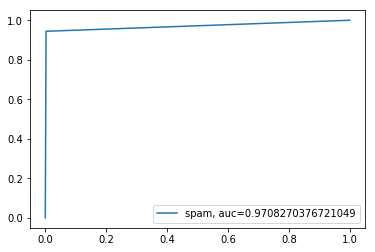

In [67]:
# create custom confusion matrix for evaluation
result = {}
cm = np.zeros((2, 2))
precisions = np.zeros(2)
recalls = np.zeros(2)
for t, p in zip(Y_test, predictions):
    cm[t][p] += 1

tp = np.diag(cm)
fn = np.sum(cm, axis=1) - tp
fp = np.sum(cm, axis=0) - tp

for i in range(2):
    p_denom = tp[i] + fp[i]
    r_denom = tp[i] + fn[i]
    precisions[i] = 0 if p_denom == 0 else tp[i]/p_denom
    recalls[i] = 0 if r_denom == 0 else tp[i]/r_denom
    
# calculate from sklearn
fpr_, tpr_, _ = roc_curve(Y_test,  predictions)
#tpr = cm[1][1] / (cm[1][1] + cm[1][0])
tpr = recalls[1]
fpr = cm[0][1] / (cm[0][1] + cm[0][0])

precision = np.average(precisions)
recall = np.average(recalls)
f1 = 2 * precision * recall / (precision + recall)

print("Confusion Matrix:\n{}".format(cm))
print("Recall for Spam:\n{}".format(recall))
print("Precision for Spam:\n{}".format(precision))

plt.plot(fpr_, tpr_, label="spam, auc="+str(score))
plt.legend(loc=4)
plt.show()

In [45]:
test_docs = [
    "you have won a lottery",
    "click the link",
    "i have a meeting"
]
predictions = model.predict(vectorizer.transform(test_docs))
predictions

array([1, 1, 0])